In [1]:
from model import *

In [2]:
print('equilibrium conditions:')
equilibrium = get_conditions(288,verbose=True)

print('\ndeglaciation at:')
deglaciation = get_conditions(260)[0]
print(f"{deglaciation:0.0f} ppm = {deglaciation/1e6:0.1f} bar")

equilibrium conditions:
pCO2 = 9138 ppm
albedo = 0.29

deglaciation at:
105739 ppm = 0.1 bar


In [3]:
t_max = 80
results = run_model(T0=238,
                    V_C=6.5,
                    V_red=1.3,
                    t_max=t_max,verbose=True)
results_canon = results

t = results['t']
T = results['T']
snowball = results['snowball']
pO2 = results['pO2']
pO2_ppm = pO2*201000

times = get_times(t,snowball,return_dict=True)
deglaciation_time = times['snowball_ends'][0]
print(f"Deglaciation in {deglaciation_time:0.2f} Myr")
            
SMIF_threshold = 2.1 # ppm
try:
    SMIF_time = t[np.where(pO2_ppm<=SMIF_threshold)[0][0]]
    print(f"S-MIF in {SMIF_time:0.2f} Myr")
except:
    print("No S-MIF")

Initial conditions
    T0 = 238 K
    albedo = 0.60
    pCO2 = 5864 ppm
    pO2 = 0.1 PAL
    1.1 Emol C in atmos
    13.0 Emol C in surficial system
Equilibrium conditions
    Teq = 288 K
    albedo = 0.29
    pCO2 = 9.1e+03 ppm
Carbon cycle
    CO2 degassing = 6.5 Emol/Myr
    Sil. weathering = 3.6 Emol/Myr
    Sea. weathering = 1.6 Emol/Myr
    Org. weathering = 0.0 Emol/Myr
    Org. burial = 1.3 Emol/Myr
Oxygen cycle
    Reduced gases = 1.3 Emol/Myr
    Org. weathering = 0.0 Emol/Myr
    Org. C burial = 1.3 Emol/Myr
Phosphorus cycle
    Weathering = 0.04 Emol/Myr
    Org. burial = 0.01 Emol/Myr
    Inorg. burial = 0.03 Emol/Myr
Deglaciation in 3.77 Myr
S-MIF in 2.84 Myr


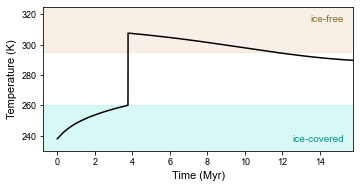

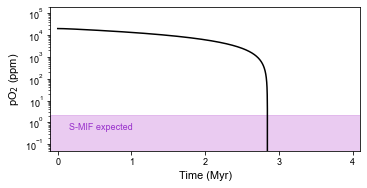

In [6]:
from matplotlib import rcParams

rcParams['font.family'] = 'Arial'

# --- temperature fig ---

figT = plt.figure(figsize=(4.3, 2))
axT = figT.add_axes([0, 0, 1, 1])

axT.plot(t, T, c='k', alpha=1)
annotate_temp(axT, t_max=15, Sturtian=False)

axT.set_xlabel('Time (Myr)', fontsize=11)
axT.set_ylabel('Temperature (K)', fontsize=11)
axT.tick_params(labelsize=9)

figT.savefig("figs/canonical_temp.svg", format='svg', bbox_inches="tight", transparent=True)

# --- pO2 fig ---
figO2 = plt.figure(figsize=(4.3, 2))
axO2 = figO2.add_axes([0, 0, 1, 1])  # Full plot area used

mask = t <= 3.5
axO2.plot(t[mask], pO2_ppm[mask], c='k')
axO2.set_ylim(5e-2,2e5)

axO2.set_xlabel('Time (Myr)', fontsize=11)
axO2.set_ylabel('pO$_2$ (ppm)', fontsize=11)
axO2.set_yscale('log')
axO2.set_xlim(-0.1, 4.1)

# S-MIF annotation
SMIF_threshold = 2.1
axO2.axhspan(0, SMIF_threshold, color='mediumorchid', alpha=0.3)
axO2.text(0.15, 1, 'S-MIF expected', color='darkorchid',
          ha='left', va='top', fontsize=9)

# x axis format
axO2.set_xticks([0, 1, 2, 3, 4])
axO2.set_xticklabels(['0', '1', '2', '3', '4'])
axO2.tick_params(labelsize=9)

figO2.savefig("figs/canonical_pO2.svg", format='svg', bbox_inches="tight", transparent=True)


plt.show()
